### 航班總數先排名 選出頻繁 熱門航班 大眾都會遇到的航班 再去比較這些航班的誤點率 而且要附帶起飛機場 降落機場 增加實用性

### 疫情前後的Top 20 delay航班排行

In [1]:
import pandas as pd
# import matplotlib_inline as plt
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_palette('pastel')
# sns.set_palette('husl',3)
sns.set_style('darkgrid')
# sns.set_style('whitegrid')
%config inlineBackend.figure_format = 'retina'

In [2]:
# EDA_pt = pd.read_csv('flight_info.csv')
EDA_pt = pd.read_csv('C:/Users/terra/BDSE29_learning data/期末專題/3.期末/2.資料處理/flight/flight_info.csv')

# EDA_pt

C:\Users\terra\AppData\Local\Temp\ipykernel_6932\2941003743.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  EDA_pt = pd.read_csv('C:/Users/terra/BDSE29_learning data/期末專題/3.期末/2.資料處理/flight/flight_info.csv')


### 篩選出疫情前的航班們

In [8]:
EDA_pt_act_COV_B = EDA_pt[ (EDA_pt['depa_year']== 2017) | (EDA_pt['depa_year']== 2018) | (EDA_pt['depa_year']== 2019) ]
EDA_pt_act_COV_B

,airline_code,flight_num,tail_num,depa_airport,dest_airport,depa_year,depa_month,depa_date,sche_depa_hr,sche_depa_min,...,state_code_depa,WBAN_depa,timezone_depa,airport_code_depa,hub_type_depa,state_code_dest,WBAN_dest,timezone_dest,airport_code_dest,hub_type_dest
0,DL,1084,991AT,ABE,ATL,2017,1,8,6,40,...,PA,14737,-5,ABE,medium_airport,GA,13874,-5,ATL,large_airport
1,DL,2561,986AT,ABE,ATL,2017,1,9,6,0,...,PA,14737,-5,ABE,medium_airport,GA,13874,-5,ATL,large_airport
2,DL,2561,965AT,ABE,ATL,2017,1,10,6,0,...,PA,14737,-5,ABE,medium_airport,GA,13874,-5,ATL,large_airport
3,DL,2561,921AT,ABE,ATL,2017,1,11,6,0,...,PA,14737,-5,ABE,medium_airport,GA,13874,-5,ATL,large_airport
4,DL,2561,940AT,ABE,ATL,2017,1,12,6,0,...,PA,14737,-5,ABE,medium_airport,GA,13874,-5,ATL,large_airport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19079798,YV,5807,903FJ,YUM,PHX,2019,12,30,21,22,...,AZ,0,-7,YUM,medium_airport,AZ,23183,-7,PHX,large_airport
19079799,YV,5813,245LR,YUM,PHX,2019,12,30,13,26,...,AZ,0,-7,YUM,medium_airport,AZ,23183,-7,PHX,large_airport
19079800,YV,5803,945LR,YUM,PHX,2019,12,31,9,46,...,AZ,0,-7,YUM,medium_airport,AZ,23183,-7,PHX,large_airport
19079801,YV,5807,914FJ,YUM,PHX,2019,12,31,21,22,...,AZ,0,-7,YUM,medium_airport,AZ,23183,-7,PHX,large_airport


In [9]:
EDA_pt_act_COV_B.shape

(19079803, 37)

In [4]:
EDA_pt.isna().sum()

airline_code                    0
flight_num                      0
tail_num                   236502
depa_airport                    0
dest_airport                    0
depa_year                       0
depa_month                      0
depa_date                       0
sche_depa_hr                    0
sche_depa_min                   0
actu_depa_hr                    0
actu_depa_min                   0
dest_year                       0
dest_month                      0
dest_date                       0
dest_hr                         0
dest_min                        0
sche_duration                   0
actu_duration                   0
delay_total_time                0
delay_depa_time                 0
delay_dest_time                 0
delay_carrier_time              0
delay_weather_time              0
delay_NAS_time                  0
delay_security_time             0
delay_late_arrival_time         0
state_code_depa                 0
WBAN_depa                       0
timezone_depa 

In [10]:
## 取得出勤航班
#篩掉取消航班，留下真的有飛的航班
# EDA_pt_act=EDA_pt[EDA_pt['actu_depa_hr'] + EDA_pt['actu_depa_min']  +  EDA_pt['actu_duration'] != 0]
EDA_pt_act_COV_B = EDA_pt_act_COV_B[EDA_pt_act_COV_B['actu_duration'] != 0]
EDA_pt_act_COV_B.shape

(18729947, 37)

In [16]:
## 取得出勤航班數
# 以航班分組，檢視每條航班實際出勤數
total_flights = EDA_pt_act_COV_B.groupby(['airline_code','depa_airport','dest_airport']).count()[['tail_num']]
total_flights = total_flights.reset_index(drop=False)
total_flights

,airline_code,depa_airport,dest_airport,tail_num
0,9E,ABE,ATL,889
1,9E,ABE,DTW,1
2,9E,ABY,ATL,245
3,9E,ACK,LGA,61
4,9E,AEX,ATL,1707
...,...,...,...,...
15588,YX,XNA,IAH,633
15589,YX,XNA,LGA,822
15590,YX,XNA,MIA,13
15591,YX,XNA,ORD,243


In [11]:
total_flights_Top100 = total_flights.nlargest(100,'tail_num')
total_flights_Top100

,airline_code,depa_airport,dest_airport,tail_num
6917,HA,HNL,OGG,29509
6948,HA,OGG,HNL,29484
6929,HA,KOA,HNL,21391
6911,HA,HNL,KOA,20812
6915,HA,HNL,LIH,20081
...,...,...,...,...
2592,DL,ATL,DFW,10836
2093,AS,SFO,SEA,10834
13005,WN,LAS,SAN,10830
11844,UA,ORD,DEN,10811


In [44]:
total_flights_Top100['airline_code']

5213     HA
5249     HA
1798     AS
2032     B6
11628    WN
         ..
9759     UA
2191     B6
2441     DL
9385     UA
10547    WN
Name: airline_code, Length: 100, dtype: object

### 每條航班排行繪圖

<Axes: title={'center': 'total_flights'}, xlabel='airline_code', ylabel='tail_num'>

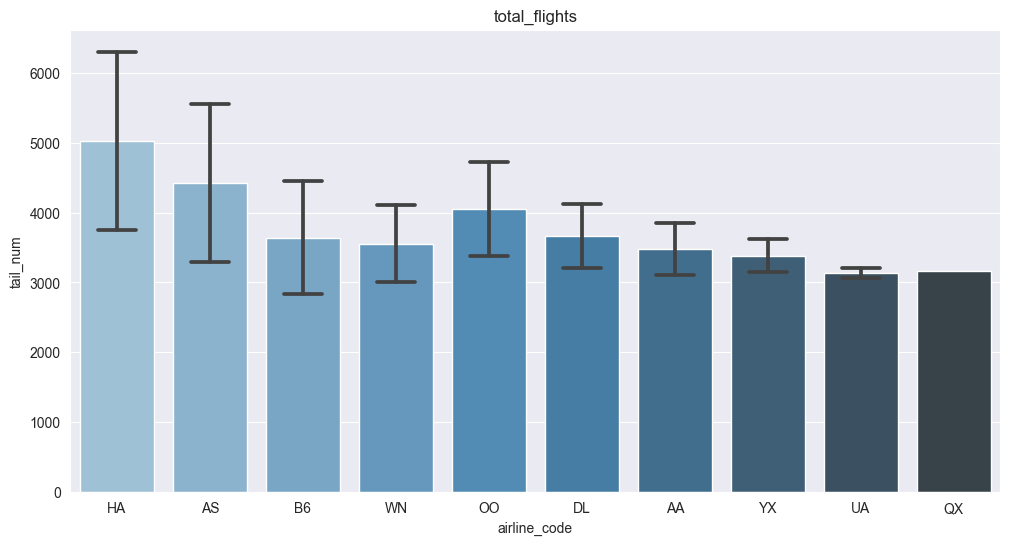

In [43]:
##存出圖表

#设置一个（12，6）的画布
plt.figure(figsize=(12, 6))
plt.title('total_flights_Top100_2022')
#图形绘制代码
sns.barplot(data = total_flights_Top100 , x="airline_code" , y="tail_num", palette="Blues_d",capsize=.4,errorbar='sd')

#将画布保存为'xiang.png'，还可以保存为jpg、svg格式图片
# plt.savefig('Top20 最會delay 航空公司.png')

In [12]:
total_flights_Top100_index = total_flights_Top100.index
total_flights_Top100_index

Int64Index([ 6917,  6948,  6929,  6911,  6915,  6940, 12869, 12611,  2634,
             3207,  2005,  3159,  2631,  1758,  6909,  6926,  1024,  1209,
             2964,  2604, 11476,  1884,  2692,  3657,  2034, 12057,  1046,
             1394,  1256,  1409,   943,   810,  2625,  3043, 12084, 11907,
            13712, 13620, 13033, 13339, 11731,  2666,  3437, 12071, 13328,
            13622, 13758, 12470, 11869,  1215,  1171,  2843,  3235,  2639,
             2590,  2568,  2738,  2628,  3116,  2594, 11445, 11711,  2645,
            13351,  3267, 13611,  1051,  1529,  2573,  1026,  2776,  1248,
              979,   782, 11040,  1253,  2949,  2599,  3380,  2654,  1060,
             1034,  1630,  2656,  3389,  2646,  3351,   992,   860, 13460,
            12722, 12053, 11106,  2859,  2058,  2592,  2093, 13005, 11844,
            11723],
           dtype='int64')

In [14]:
COV_B_flights_Top100_all = total_flights.iloc[total_flights_Top100_index ,:]
COV_B_flights_Top100_all 

,airline_code,depa_airport,dest_airport,tail_num
6917,HA,HNL,OGG,29509
6948,HA,OGG,HNL,29484
6929,HA,KOA,HNL,21391
6911,HA,HNL,KOA,20812
6915,HA,HNL,LIH,20081
...,...,...,...,...
2592,DL,ATL,DFW,10836
2093,AS,SFO,SEA,10834
13005,WN,LAS,SAN,10830
11844,UA,ORD,DEN,10811


In [15]:
COV_B_flights_Top100_all [['depa_year']].describe().T

KeyError: "None of [Index(['depa_year'], dtype='object')] are in the [columns]"

In [17]:
## 取得delay航班數
#先篩選出有delay的出勤航班 再以航班分組
# delay_counts = EDA_pt_act.groupby('flight_num')
delay_counts = EDA_pt_act_COV_B [EDA_pt_act_COV_B ['delay_total_time'] > 15].groupby(['airline_code','depa_airport','dest_airport']).count()[['tail_num']]
delay_counts =delay_counts.reset_index(drop=False)
delay_counts

,airline_code,depa_airport,dest_airport,tail_num
0,9E,ABE,ATL,170
1,9E,ABY,ATL,45
2,9E,ACK,LGA,18
3,9E,AEX,ATL,241
4,9E,AGS,ATL,371
...,...,...,...,...
14878,YX,XNA,IAH,118
14879,YX,XNA,LGA,201
14880,YX,XNA,MIA,2
14881,YX,XNA,ORD,40


In [18]:
delay_counts_pt = pd.merge(
    total_flights,
    delay_counts,
    left_on= ['airline_code','depa_airport','dest_airport' ],
    right_on=[ 'airline_code','depa_airport','dest_airport' ],
    how= 'left',
    suffixes=('_total_flights','_delay_flights')
)

delay_counts_pt['tail_num_delay_flights'] = delay_counts_pt['tail_num_delay_flights'].fillna(0)
delay_counts_pt

,airline_code,depa_airport,dest_airport,tail_num_total_flights,tail_num_delay_flights
0,9E,ABE,ATL,889,170.0
1,9E,ABE,DTW,1,0.0
2,9E,ABY,ATL,245,45.0
3,9E,ACK,LGA,61,18.0
4,9E,AEX,ATL,1707,241.0
...,...,...,...,...,...
15588,YX,XNA,IAH,633,118.0
15589,YX,XNA,LGA,822,201.0
15590,YX,XNA,MIA,13,2.0
15591,YX,XNA,ORD,243,40.0


In [20]:
## 計算誤點率
#計算每條航班的誤點率 該航班誤點數 / 該航班出勤數 並把誤點率從高至低排序
delay_counts_pt['delay_rates'] = delay_counts_pt['tail_num_delay_flights'] / delay_counts_pt['tail_num_total_flights']
delay_counts_pt = delay_counts_pt.reset_index(drop=False)
# delay_rates=delay_rates.reset_index(drop=False)
# delay_rates= delay_rates.rename(columns={'tail_num':'delay_rates'})
delay_counts_pt = delay_counts_pt.sort_values(by= 'delay_rates',ascending=False)
delay_counts_pt

,index,airline_code,depa_airport,dest_airport,tail_num_total_flights,tail_num_delay_flights,delay_rates
0,2884,DL,DTW,DAY,1,1.0,1.0
104,9480,OO,GEG,MHK,1,1.0,1.0
106,4080,EV,DTW,PIA,1,1.0,1.0
107,4260,EV,IAD,PWM,1,1.0,1.0
108,5619,F9,PHX,TUL,1,1.0,1.0
...,...,...,...,...,...,...,...
15121,15350,YX,ORF,DTW,8,0.0,0.0
15122,1338,AA,MSN,LAX,2,0.0,0.0
15123,11468,UA,EWR,RIC,2,0.0,0.0
15124,12146,UA,SYR,IAD,1,0.0,0.0


### 看一下分佈 發現誤點率0 1 真的是極端值 = = 尤其1的各數不多 反倒是0的個數蠻多的

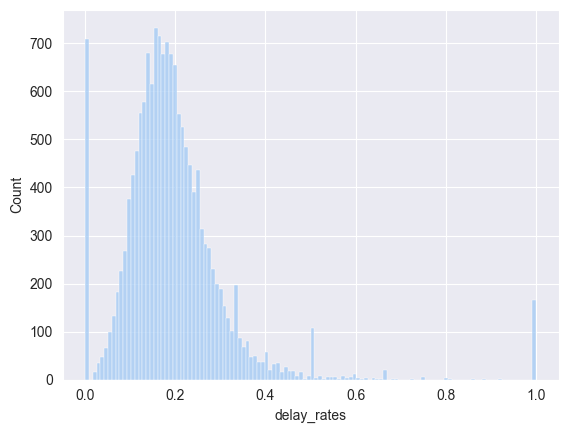

In [22]:
sns.histplot(data=delay_counts_pt, x="delay_rates" )
plt.show()

In [27]:
delay_counts_pt_plt = delay_counts_pt[delay_counts_pt['delay_rates']<1]
delay_counts_pt_plt['flight_name'] = delay_counts_pt_plt[['airline_code','depa_airport','dest_airport']].apply(lambda x : '-'.join(x), axis=1)
# df['col_combined'] = df[['col1', 'col2']].apply(lambda x: ':'.join(x.astype(str)), axis=1)
delay_counts_pt_plt_Top20 =  delay_counts_pt_plt.nlargest(20,'delay_rates')
delay_counts_pt_plt_Top20

C:\Users\terra\AppData\Local\Temp\ipykernel_6932\1598406029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay_counts_pt_plt['flight_name'] = delay_counts_pt_plt[['airline_code','depa_airport','dest_airport']].apply(lambda x : '-'.join(x), axis=1)


,index,airline_code,depa_airport,dest_airport,tail_num_total_flights,tail_num_delay_flights,delay_rates,flight_name
165,8178,NK,SJU,BOS,12,11.0,0.916667,NK-SJU-BOS
166,9947,OO,MKE,DFW,9,8.0,0.888889,OO-MKE-DFW
167,10731,OO,SJC,MSP,7,6.0,0.857143,OO-SJC-MSP
168,5756,F9,SDF,AUS,26,21.0,0.807692,F9-SDF-AUS
171,10823,OO,SNA,SEA,5,4.0,0.800000,OO-SNA-SEA
169,10646,OO,SEA,SNA,5,4.0,0.800000,OO-SEA-SNA
170,9906,OO,MCO,GRR,5,4.0,0.800000,OO-MCO-GRR
172,13719,WN,SJU,EWR,48,36.0,0.750000,WN-SJU-EWR
173,7418,MQ,ORD,AGS,8,6.0,0.750000,MQ-ORD-AGS
174,349,9E,FLL,CVG,4,3.0,0.750000,9E-FLL-CVG


<Axes: title={'center': 'Top20_Delay_flight_COV_B'}, xlabel='flight_name', ylabel='delay_rates'>

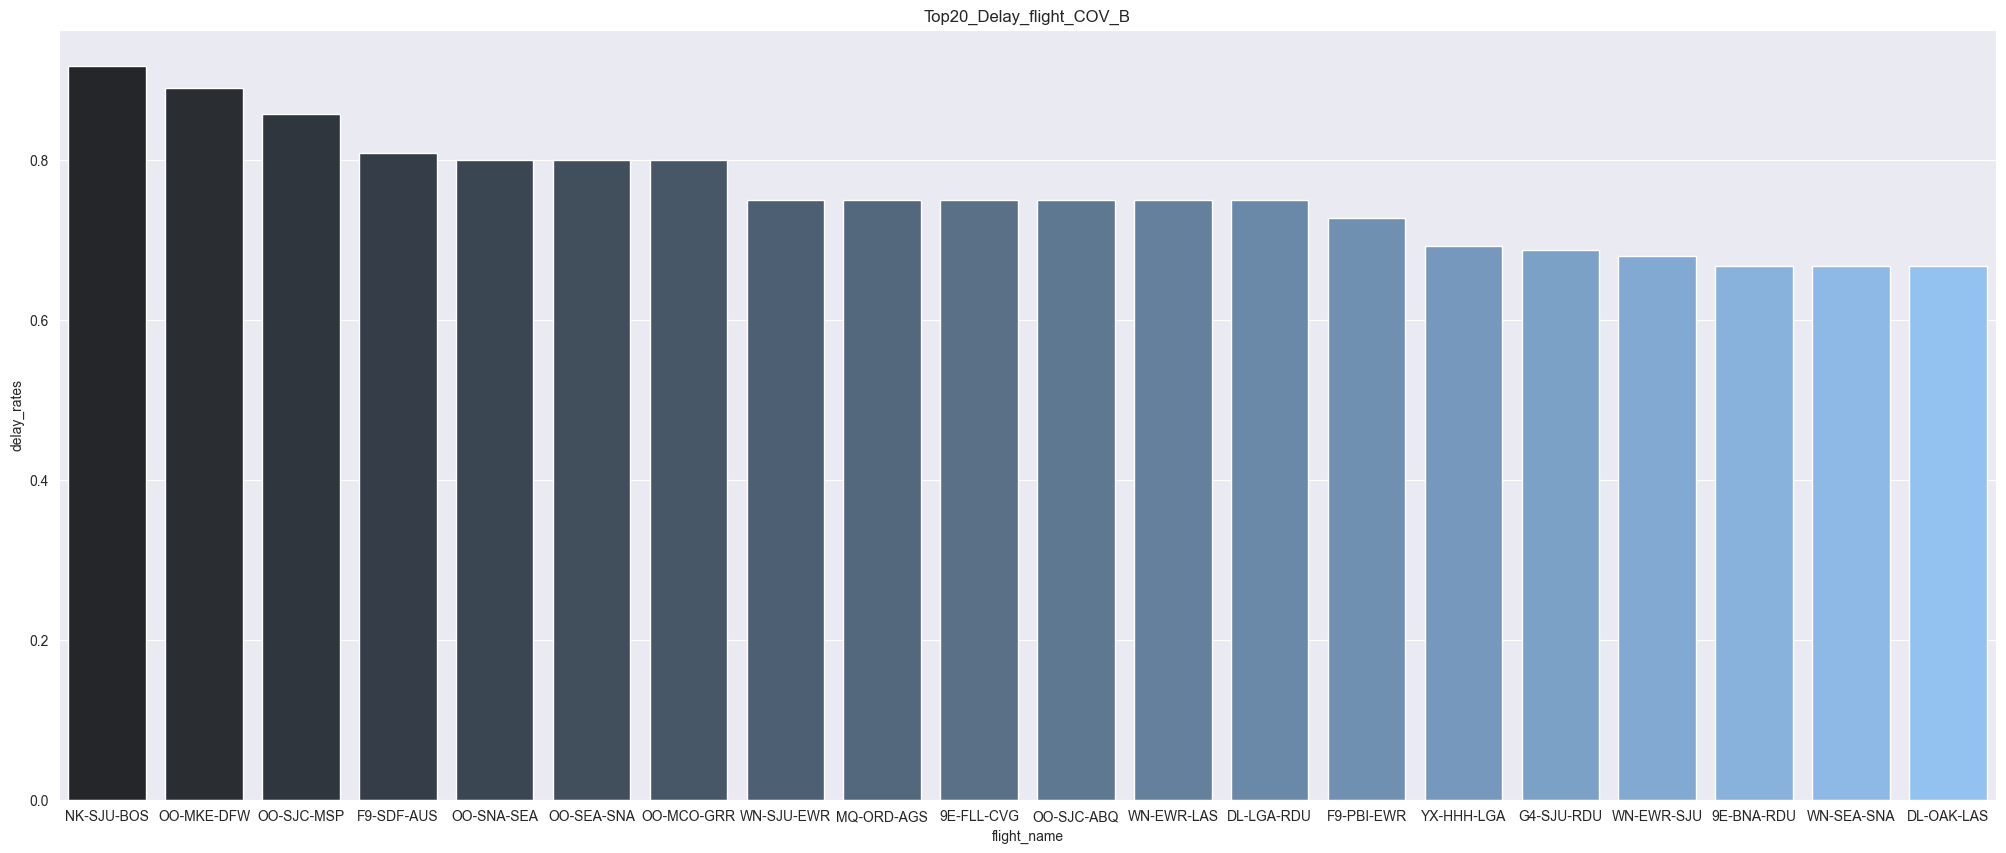

In [54]:
## 繪圖
#以seaborn 劃出長條圖 
#palette="Blues" 可以設定為同一顏色 並漸層 
#不設定顏色 套件會自動選色 一人一色

#設定畫布大小
plt.figure(figsize=(25, 10))

#設定圖表標頭
plt.title('Top20_Delay_flight_COV_B')

# 設置漸層色彩
# colors = sns.color_palette("dark:#5A9_r", as_cmap=True)
# sns.color_palette("dark:#5A9_r", as_cmap=True)

sns.barplot(delay_counts_pt_plt_Top20 , x="flight_name" , y="delay_rates", palette="dark:#84C1FF")
# sns.barplot(delay_counts_pt_plt_Top20 , x="flight_name" , y="delay_rates", palette="light:#84C1FF_r")
# sns.barplot(delay_counts_pt_plt_Top20 , x="flight_name" , y="delay_rates", palette="Blues_r")
# , palette="Blues"

#将画布保存为'xiang.png'，还可以保存为jpg、svg格式图片
# plt.savefig('Top20 最會delay 的航班 pyspark.png')

### 疫情前後的Top 20 delay航班排行

In [55]:
EDA_pt_act_COV_A = EDA_pt[ (EDA_pt['depa_year']== 2020) | (EDA_pt['depa_year']== 2021) | (EDA_pt['depa_year']== 2022) ]
EDA_pt_act_COV_A

,airline_code,flight_num,tail_num,depa_airport,dest_airport,depa_year,depa_month,depa_date,sche_depa_hr,sche_depa_min,...,state_code_depa,WBAN_depa,timezone_depa,airport_code_depa,hub_type_depa,state_code_dest,WBAN_dest,timezone_dest,airport_code_dest,hub_type_dest
19079803,9E,4786,305PQ,ABE,ATL,2020,1,1,6,0,...,PA,14737,-5,ABE,medium_airport,GA,13874,-5,ATL,large_airport
19079804,9E,4786,325PQ,ABE,ATL,2020,1,2,6,0,...,PA,14737,-5,ABE,medium_airport,GA,13874,-5,ATL,large_airport
19079805,9E,5197,914XJ,ABE,ATL,2020,1,2,18,0,...,PA,14737,-5,ABE,medium_airport,GA,13874,-5,ATL,large_airport
19079806,9E,4786,309PQ,ABE,ATL,2020,1,3,6,0,...,PA,14737,-5,ABE,medium_airport,GA,13874,-5,ATL,large_airport
19079807,9E,5197,272PQ,ABE,ATL,2020,1,3,18,0,...,PA,14737,-5,ABE,medium_airport,GA,13874,-5,ATL,large_airport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35755096,YV,5781,329MS,YUM,PHX,2022,12,27,19,19,...,AZ,0,-7,YUM,medium_airport,AZ,23183,-7,PHX,large_airport
35755097,YV,5905,950LR,YUM,PHX,2022,12,28,11,40,...,AZ,0,-7,YUM,medium_airport,AZ,23183,-7,PHX,large_airport
35755098,YV,5905,329MS,YUM,PHX,2022,12,29,11,40,...,AZ,0,-7,YUM,medium_airport,AZ,23183,-7,PHX,large_airport
35755099,YV,5905,249LR,YUM,PHX,2022,12,30,11,40,...,AZ,0,-7,YUM,medium_airport,AZ,23183,-7,PHX,large_airport


In [57]:
EDA_pt_act_COV_A.shape

(16675298, 37)

In [58]:
## 取得出勤航班
#篩掉取消航班，留下真的有飛的航班
# EDA_pt_act=EDA_pt[EDA_pt['actu_depa_hr'] + EDA_pt['actu_depa_min']  +  EDA_pt['actu_duration'] != 0]
EDA_pt_act_COV_A = EDA_pt_act_COV_A[EDA_pt_act_COV_A['actu_duration'] != 0]
EDA_pt_act_COV_A.shape

(16105760, 37)

In [59]:
## 取得出勤航班數
# 以航班分組，檢視每條航班實際出勤數
total_flights_A = EDA_pt_act_COV_A.groupby(['airline_code','depa_airport','dest_airport']).count()[['tail_num']]
total_flights_A = total_flights_A.reset_index(drop=False)
total_flights_A

,airline_code,depa_airport,dest_airport,tail_num
0,9E,ABE,ATL,1540
1,9E,ABE,DTW,1227
2,9E,ABY,ATL,2394
3,9E,ACK,JFK,365
4,9E,ACK,LGA,265
...,...,...,...,...
17059,YX,XNA,IAH,82
17060,YX,XNA,LGA,926
17061,YX,XNA,MIA,129
17062,YX,XNA,ORD,426


In [60]:
total_flights_A['tail_num'].sum()

16105760

In [61]:
## 取得delay航班數
#先篩選出有delay的出勤航班 再以航班分組
# delay_counts = EDA_pt_act.groupby('flight_num')
delay_counts_A = EDA_pt_act_COV_A [EDA_pt_act_COV_A ['delay_total_time'] > 15].groupby(['airline_code','depa_airport','dest_airport']).count()[['tail_num']]
delay_counts_A =delay_counts_A.reset_index(drop=False)
delay_counts_A

,airline_code,depa_airport,dest_airport,tail_num
0,9E,ABE,ATL,156
1,9E,ABE,DTW,127
2,9E,ABY,ATL,212
3,9E,ACK,JFK,58
4,9E,ACK,LGA,58
...,...,...,...,...
16132,YX,XNA,IAH,14
16133,YX,XNA,LGA,161
16134,YX,XNA,MIA,6
16135,YX,XNA,ORD,61


In [62]:
delay_counts_pt_A = pd.merge(
    total_flights_A,
    delay_counts_A,
    left_on= ['airline_code','depa_airport','dest_airport' ],
    right_on=[ 'airline_code','depa_airport','dest_airport' ],
    how= 'left',
    suffixes=('_total_flights','_delay_flights')
)

delay_counts_pt_A['tail_num_delay_flights'] = delay_counts_pt_A['tail_num_delay_flights'].fillna(0)
delay_counts_pt_A

,airline_code,depa_airport,dest_airport,tail_num_total_flights,tail_num_delay_flights
0,9E,ABE,ATL,1540,156.0
1,9E,ABE,DTW,1227,127.0
2,9E,ABY,ATL,2394,212.0
3,9E,ACK,JFK,365,58.0
4,9E,ACK,LGA,265,58.0
...,...,...,...,...,...
17059,YX,XNA,IAH,82,14.0
17060,YX,XNA,LGA,926,161.0
17061,YX,XNA,MIA,129,6.0
17062,YX,XNA,ORD,426,61.0


In [63]:
## 計算誤點率
#計算每條航班的誤點率 該航班誤點數 / 該航班出勤數 並把誤點率從高至低排序
delay_counts_pt_A['delay_rates'] = delay_counts_pt_A['tail_num_delay_flights'] / delay_counts_pt_A['tail_num_total_flights']
delay_counts_pt_A = delay_counts_pt_A.reset_index(drop=False)
# delay_rates=delay_rates.reset_index(drop=False)
# delay_rates= delay_rates.rename(columns={'tail_num':'delay_rates'})
delay_counts_pt_A = delay_counts_pt_A.sort_values(by= 'delay_rates',ascending=False)
delay_counts_pt_A

,index,airline_code,depa_airport,dest_airport,tail_num_total_flights,tail_num_delay_flights,delay_rates
745,745,9E,SBN,MSP,1,1.0,1.0
6125,6125,G4,MDW,LAS,2,2.0,1.0
4199,4199,EV,GSP,MSY,1,1.0,1.0
4204,4204,EV,HPN,ORD,1,1.0,1.0
9842,9842,OO,DTW,BWI,1,1.0,1.0
...,...,...,...,...,...,...,...
15933,15933,YX,DEN,CMH,8,0.0,0.0
15930,15930,YX,DEN,BIL,4,0.0,0.0
15928,15928,YX,DEN,AUS,1,0.0,0.0
15926,15926,YX,DEN,ABQ,5,0.0,0.0


### 看一下分佈 發現誤點率0 1 真的是極端值 = = 尤其1的各數不多 反倒是0的個數蠻多的

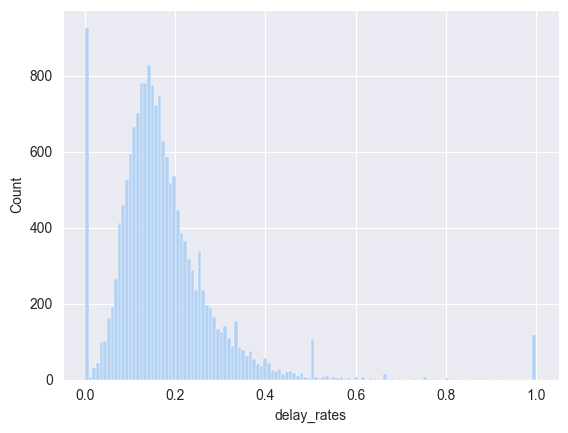

In [64]:
sns.histplot(data=delay_counts_pt_A, x="delay_rates" )
plt.show()

In [65]:
delay_counts_pt_plt_A = delay_counts_pt_A[delay_counts_pt_A['delay_rates']<1]
delay_counts_pt_plt_A['flight_name'] = delay_counts_pt_plt_A[['airline_code','depa_airport','dest_airport']].apply(lambda x : '-'.join(x), axis=1)
# df['col_combined'] = df[['col1', 'col2']].apply(lambda x: ':'.join(x.astype(str)), axis=1)
delay_counts_pt_plt_Top20_A =  delay_counts_pt_plt_A.nlargest(20,'delay_rates')
delay_counts_pt_plt_Top20_A

C:\Users\terra\AppData\Local\Temp\ipykernel_6932\3543173937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay_counts_pt_plt_A['flight_name'] = delay_counts_pt_plt_A[['airline_code','depa_airport','dest_airport']].apply(lambda x : '-'.join(x), axis=1)


,index,airline_code,depa_airport,dest_airport,tail_num_total_flights,tail_num_delay_flights,delay_rates,flight_name
11506,11506,QX,BIL,GTF,13,12.0,0.923077,QX-BIL-GTF
9406,9406,OO,BUF,IAD,28,25.0,0.892857,OO-BUF-IAD
11384,11384,OO,SRQ,IAH,88,77.0,0.875000,OO-SRQ-IAH
2910,2910,B6,SEA,EWR,37,32.0,0.864865,B6-SEA-EWR
5710,5710,G4,CLE,VPS,24,20.0,0.833333,G4-CLE-VPS
8651,8651,OH,AGS,PHL,11,9.0,0.818182,OH-AGS-PHL
5806,5806,G4,FLL,ATW,61,49.0,0.803279,G4-FLL-ATW
9049,9049,OH,PHL,AGS,10,8.0,0.800000,OH-PHL-AGS
6414,6414,G4,PSC,SAN,20,16.0,0.800000,G4-PSC-SAN
12172,12172,UA,FCA,IAH,9,7.0,0.777778,UA-FCA-IAH


<Axes: title={'center': 'Top20_Delay_flight_COV_A'}, xlabel='flight_name', ylabel='delay_rates'>

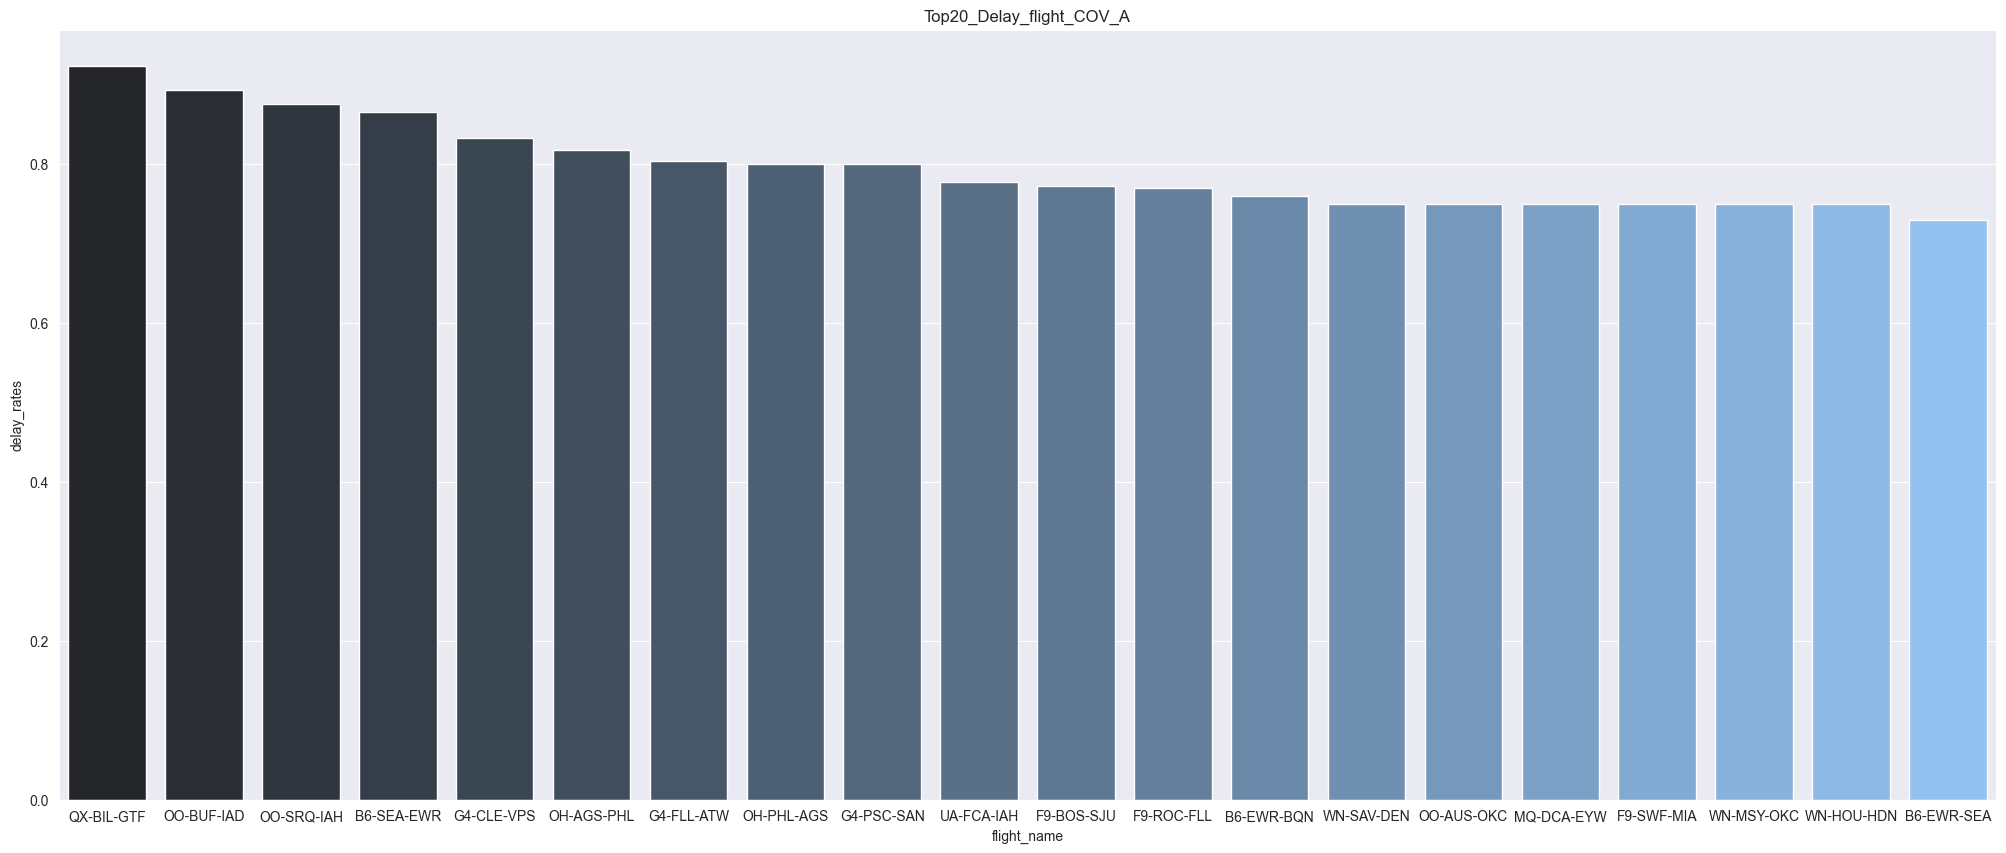

In [66]:
## 繪圖
#以seaborn 劃出長條圖 
#palette="Blues" 可以設定為同一顏色 並漸層 
#不設定顏色 套件會自動選色 一人一色

#設定畫布大小
plt.figure(figsize=(25, 10))

#設定圖表標頭
plt.title('Top20_Delay_flight_COV_A')

# 設置漸層色彩
# colors = sns.color_palette("dark:#5A9_r", as_cmap=True)
# sns.color_palette("dark:#5A9_r", as_cmap=True)

sns.barplot(delay_counts_pt_plt_Top20_A , x="flight_name" , y="delay_rates", palette="dark:#84C1FF")
# sns.barplot(delay_counts_pt_plt_Top20 , x="flight_name" , y="delay_rates", palette="light:#84C1FF_r")
# sns.barplot(delay_counts_pt_plt_Top20 , x="flight_name" , y="delay_rates", palette="Blues_r")
# , palette="Blues"

#将画布保存为'xiang.png'，还可以保存为jpg、svg格式图片
# plt.savefig('Top20 最會delay 的航班 pyspark.png')

### 疫情前後 航班 Top20比較一下

In [114]:
COV_A = delay_counts_pt_plt_Top20_A[['flight_name']]
COV_A['xxx'] = COV_A['flight_name'].apply( lambda x : x.split('-') )
COV_A['airline_code'] = COV_A['xxx'].apply( lambda x : x[0] )
COV_A['depa_airport'] = COV_A['xxx'].apply( lambda x : x[1] )
COV_A['dest_airport'] = COV_A['xxx'].apply( lambda x : x[2] )
# COV_A.iloc[0,1][0]
COV_A

C:\Users\terra\AppData\Local\Temp\ipykernel_6932\2669414585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COV_A['xxx'] = COV_A['flight_name'].apply( lambda x : x.split('-') )
C:\Users\terra\AppData\Local\Temp\ipykernel_6932\2669414585.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COV_A['airline_code'] = COV_A['xxx'].apply( lambda x : x[0] )
C:\Users\terra\AppData\Local\Temp\ipykernel_6932\2669414585.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

,flight_name,xxx,airline_code,depa_airport,dest_airport
11506,QX-BIL-GTF,"[QX, BIL, GTF]",QX,BIL,GTF
9406,OO-BUF-IAD,"[OO, BUF, IAD]",OO,BUF,IAD
11384,OO-SRQ-IAH,"[OO, SRQ, IAH]",OO,SRQ,IAH
2910,B6-SEA-EWR,"[B6, SEA, EWR]",B6,SEA,EWR
5710,G4-CLE-VPS,"[G4, CLE, VPS]",G4,CLE,VPS
8651,OH-AGS-PHL,"[OH, AGS, PHL]",OH,AGS,PHL
5806,G4-FLL-ATW,"[G4, FLL, ATW]",G4,FLL,ATW
9049,OH-PHL-AGS,"[OH, PHL, AGS]",OH,PHL,AGS
6414,G4-PSC-SAN,"[G4, PSC, SAN]",G4,PSC,SAN
12172,UA-FCA-IAH,"[UA, FCA, IAH]",UA,FCA,IAH


In [80]:
COV_B = delay_counts_pt_plt_Top20[['flight_name']]
COV_B 

,flight_name
165,NK-SJU-BOS
166,OO-MKE-DFW
167,OO-SJC-MSP
168,F9-SDF-AUS
171,OO-SNA-SEA
169,OO-SEA-SNA
170,OO-MCO-GRR
172,WN-SJU-EWR
173,MQ-ORD-AGS
174,9E-FLL-CVG


In [116]:
COV_B = delay_counts_pt_plt_Top20[['flight_name']]
COV_B['xxx'] = COV_B['flight_name'].apply( lambda x : x.split('-') )
COV_B['airline_code'] = COV_B['xxx'].apply( lambda x : x[0] )
COV_B['depa_airport'] = COV_B['xxx'].apply( lambda x : x[1] )
COV_B['dest_airport'] = COV_B['xxx'].apply( lambda x : x[2] )
# COV_A.iloc[0,1][0]
COV_B

C:\Users\terra\AppData\Local\Temp\ipykernel_6932\2132060005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COV_B['xxx'] = COV_B['flight_name'].apply( lambda x : x.split('-') )
C:\Users\terra\AppData\Local\Temp\ipykernel_6932\2132060005.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COV_B['airline_code'] = COV_B['xxx'].apply( lambda x : x[0] )
C:\Users\terra\AppData\Local\Temp\ipykernel_6932\2132060005.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

,flight_name,xxx,airline_code,depa_airport,dest_airport
165,NK-SJU-BOS,"[NK, SJU, BOS]",NK,SJU,BOS
166,OO-MKE-DFW,"[OO, MKE, DFW]",OO,MKE,DFW
167,OO-SJC-MSP,"[OO, SJC, MSP]",OO,SJC,MSP
168,F9-SDF-AUS,"[F9, SDF, AUS]",F9,SDF,AUS
171,OO-SNA-SEA,"[OO, SNA, SEA]",OO,SNA,SEA
169,OO-SEA-SNA,"[OO, SEA, SNA]",OO,SEA,SNA
170,OO-MCO-GRR,"[OO, MCO, GRR]",OO,MCO,GRR
172,WN-SJU-EWR,"[WN, SJU, EWR]",WN,SJU,EWR
173,MQ-ORD-AGS,"[MQ, ORD, AGS]",MQ,ORD,AGS
174,9E-FLL-CVG,"[9E, FLL, CVG]",9E,FLL,CVG


In [120]:
COV_B.groupby('airline_code').count().sort_values('xxx',ascending=False)

,flight_name,xxx,depa_airport,dest_airport
airline_code,,,,
OO,6,6,6,6
WN,4,4,4,4
9E,2,2,2,2
DL,2,2,2,2
F9,2,2,2,2
G4,1,1,1,1
MQ,1,1,1,1
NK,1,1,1,1
YX,1,1,1,1


In [119]:
COV_A.groupby('airline_code').count().sort_values('xxx',ascending=False)

,flight_name,xxx,depa_airport,dest_airport
airline_code,,,,
B6,3,3,3,3
F9,3,3,3,3
G4,3,3,3,3
OO,3,3,3,3
WN,3,3,3,3
OH,2,2,2,2
MQ,1,1,1,1
QX,1,1,1,1
UA,1,1,1,1


In [78]:
COV_A_vs_COV_B = pd.merge(
    COV_A,
    COV_B,
    left_on='flight_name',
    right_on='flight_name',
    how = 'left',

)
COV_A_vs_COV_B

,flight_name
0,QX-BIL-GTF
1,OO-BUF-IAD
2,OO-SRQ-IAH
3,B6-SEA-EWR
4,G4-CLE-VPS
5,OH-AGS-PHL
6,G4-FLL-ATW
7,OH-PHL-AGS
8,G4-PSC-SAN
9,UA-FCA-IAH


In [72]:
pd.merge?

Signature:
pd.merge(
    left: 'DataFrame | Series',
    right: 'DataFrame | Series',
    how: 'str' = 'inner',
    on: 'IndexLabel | None' = None,
    left_on: 'IndexLabel | None' = None,
    right_on: 'IndexLabel | None' = None,
    left_index: 'bool' = False,
    right_index: 'bool' = False,
    sort: 'bool' = False,
    suffixes: 'Suffixes' = ('_x', '_y'),
    copy: 'bool' = True,
    indicator: 'bool' = False,
    validate: 'str | None' = None,
) -> 'DataFrame'
Docstring:
Merge DataFrame or named Series objects with a database-style join.

A named Series object is treated as a DataFrame with a single named column.

The join is done on columns or indexes. If joining columns on
columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
on indexes or indexes on a column or columns, the index will be passed on.
When performing a cross merge, no column specifications to merge on are
allowed.

.. warning::

    If both key columns contain rows where the key is a null